# Real Implact of Inflation - Final Data Analysis

In [93]:
# Importing dependencies
import warnings
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import panel as pn
import geoviews as gv
import cartopy.crs as ccrs
import seaborn as sns
import panel as pn
from processor import DF_Processor

# Setup matplolib
%matplotlib inline

In [94]:
# Set panel extension as plotly
pn.extension('plotly')
# Ignore warnings
warnings.filterwarnings('ignore')

In [95]:
# Getting and storing non-regional DataFrames
national_df, energy_df, food_df, national_less_food_energy_df = DF_Processor().get_non_regional_data()
# Getting and storing regional DataFrames
midwest_df, northeast_df, south_df, west_df = DF_Processor().get_regional_data()

## Analysis Description

Our project is to uncover the difference between the reported and actual urban inflation. We will be using the CPI data, from the Bureau of Labor Statistics, with and without food and energy costs to answer this question. Additionally, we will also be analyzing the differences in inflation between the various US regions, compared to the national average, over time.

## Part 1: Reported Inflation vs Actual Inflation (National) 

This analysis examines the differences between the reported and actual inflation on a national level.

### Analysis/Visuzalizations

In [96]:
# Method to get analysis DataFrames
get_analysis_dataframe = lambda dictionary: pd.concat([dictionary[data].copy().rename(columns={'Price': data}) for data in dictionary],
                                                       axis=1, 
                                                       join='inner')

In [97]:
# Data as Dictionary
data_dictionary = {'Normalized National Prices': national_df, 'Normalized National Prices Less F&E': national_less_food_energy_df}

# Storing DataFrame
national_dfs = get_analysis_dataframe(data_dictionary)
# Displaying Data
national_dfs

,Normalized National Prices,Normalized National Prices Less F&E
Date,,
2012-01-01,226.665,227.237
2012-02-01,227.663,227.865
2012-03-01,229.392,228.735
2012-04-01,230.085,229.303
2012-05-01,229.815,229.602
...,...,...
2022-05-01,292.296,292.506
2022-06-01,296.311,294.680
2022-07-01,296.276,295.646


In [98]:
# Lambda method to get image title
get_image_title = lambda title: f'./assets/images/{title.lower().replace(" ","_")}_plot.png'

In [99]:
# Method to return, display, and save plotly figure
def get_show_px_fig(df,title):
    # Setup plotly figure
    fig = px.line(df,labels={'value': 'Normalized Price in USD', 'variable': 'Categories'}, title=title, width=1300, height=600)
    # Display plotly figure
    fig.show()
    #  Save plotly figure as image and make title lowercase and dash separated
    fig.write_image(get_image_title(title))
    # Return figure
    return fig

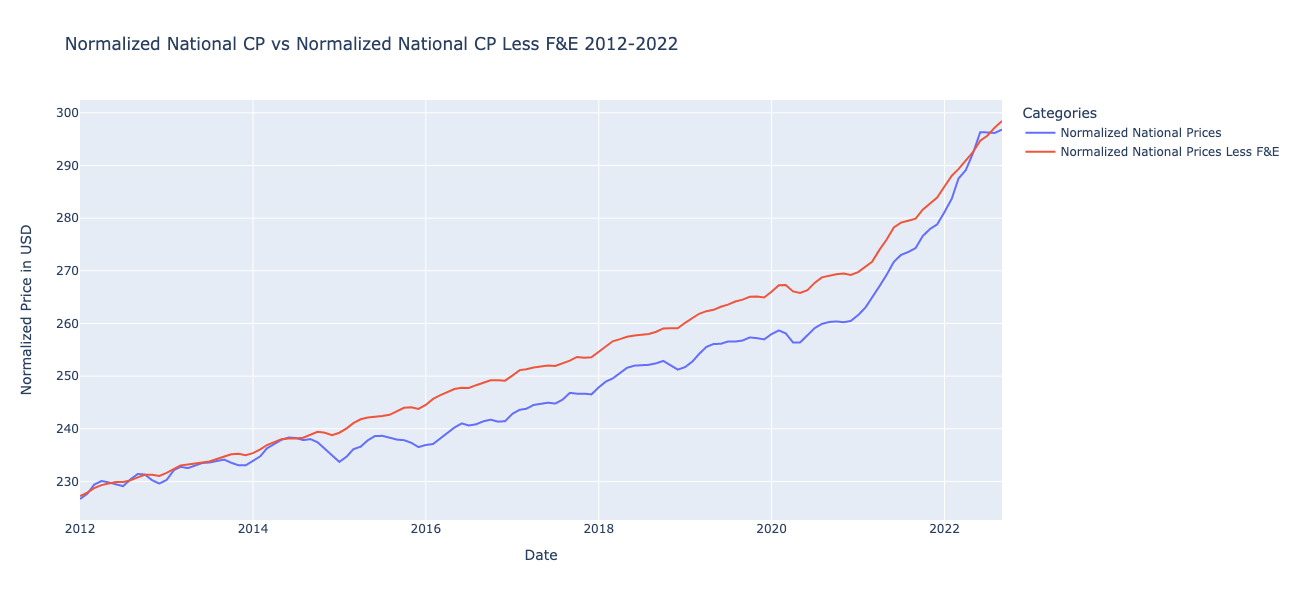

In [100]:
# Store plotly line plot
plotly_line_plot_1 = get_show_px_fig(national_dfs, "Normalized National CP vs Normalized National CP Less F&E 2012-2022")

In [101]:
# Lambda method to return DataFrames by decade
get_decade_dataframes = lambda df: [df.loc[:'2019-12-01'],df.loc['2020-01-01':]]

# Store DataFrames by decade
national_2010s_df, national_2020s_df = get_decade_dataframes(national_dfs)

# Lambda method to display heads of two DataFrames
display_two_heads = lambda df1,df2: display(df1.head(),df2.head())

# Displaying heads of both DataFrames
display_two_heads(national_2010s_df, national_2020s_df)

,Normalized National Prices,Normalized National Prices Less F&E
Date,,
2012-01-01,226.665,227.237
2012-02-01,227.663,227.865
2012-03-01,229.392,228.735
2012-04-01,230.085,229.303
2012-05-01,229.815,229.602


,Normalized National Prices,Normalized National Prices Less F&E
Date,,
2020-01-01,257.971,266.004
2020-02-01,258.678,267.268
2020-03-01,258.115,267.312
2020-04-01,256.389,266.089
2020-05-01,256.394,265.799


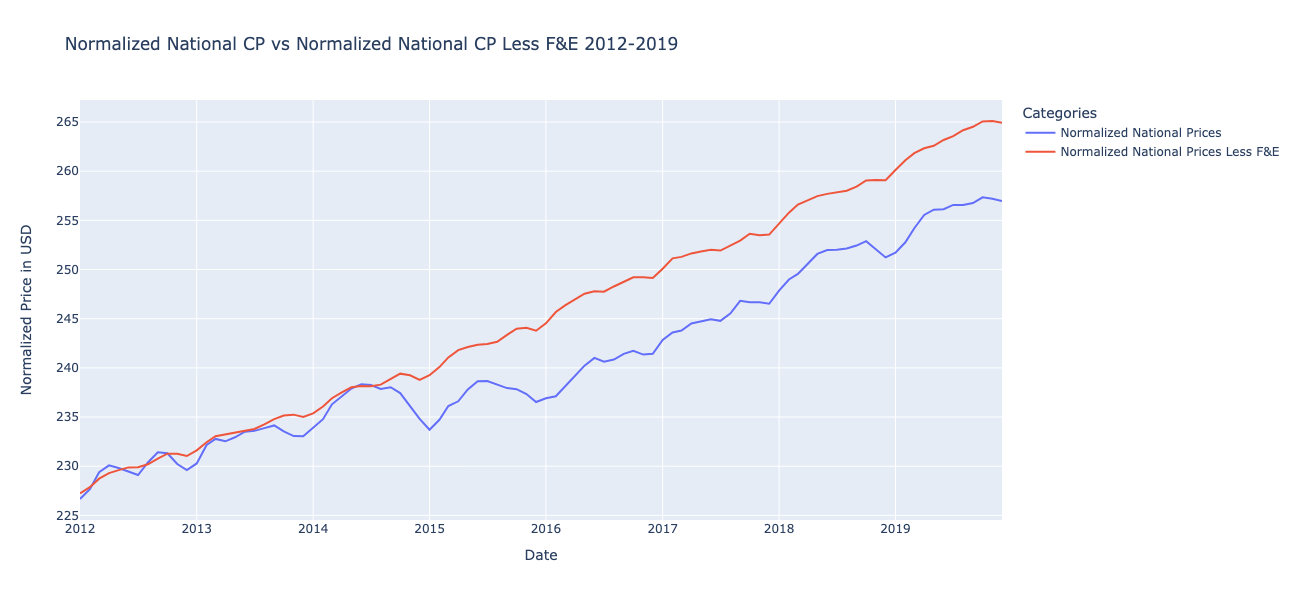

In [102]:
# Store plotly line plot
plotly_line_plot_2 = get_show_px_fig(national_2010s_df, "Normalized National CP vs Normalized National CP Less F&E 2012-2019")

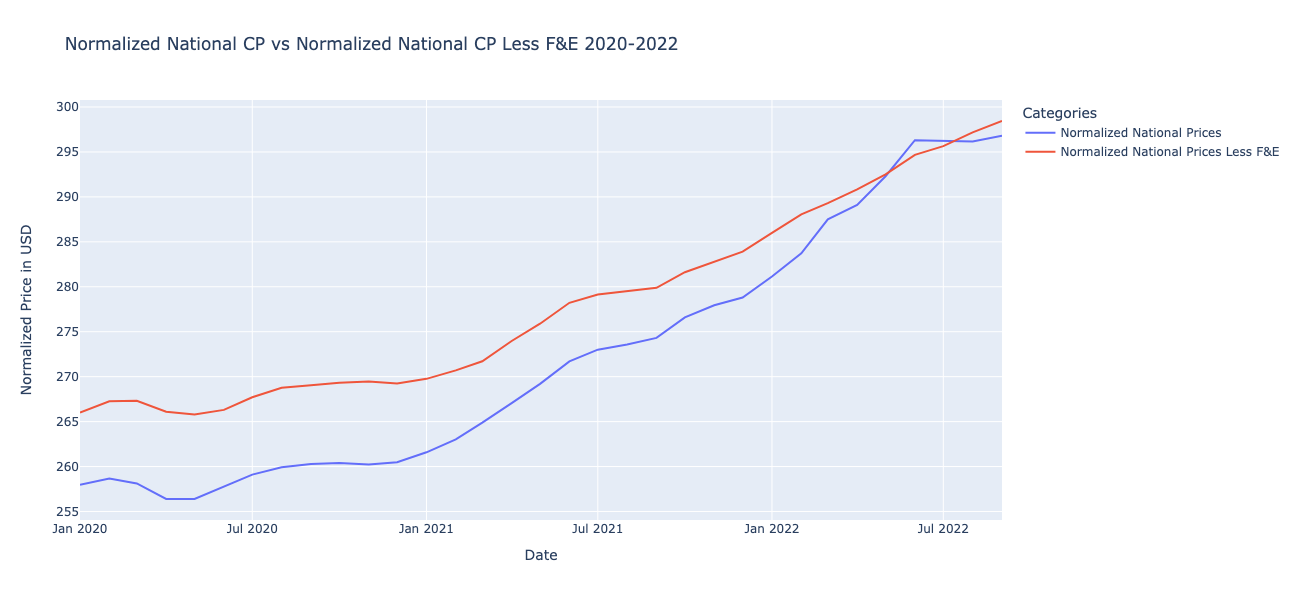

In [103]:
# Store plotly line plot
plotly_line_plot_3 = get_show_px_fig(national_2020s_df, "Normalized National CP vs Normalized National CP Less F&E 2020-2022")

In [104]:
# Method to return, display, and save seaborn correlation heatmap figure
def get_save_sns_fig(df, title):
    # Create correlation matrix DataFrame
    correlation_df = df.corr()
    
    # Save figure
    fig = plt.figure(figsize=(15,8))
    # Set title
    plt.title(title, fontsize=15, fontweight='bold')
    # Generate heatmap plot          
    sns.heatmap(correlation_df,
                    cbar_kws={'shrink': .5},
                    mask=np.triu(np.ones_like(correlation_df, dtype=bool)),
                    vmin=-1,
                    vmax=1,
                    center=0,
                    cmap='vlag', 
                    linewidth=1,
                    square=True).set(xlabel='Categories',
                                     ylabel='Categories');
    fig.show()
    fig.savefig(get_image_title(title))

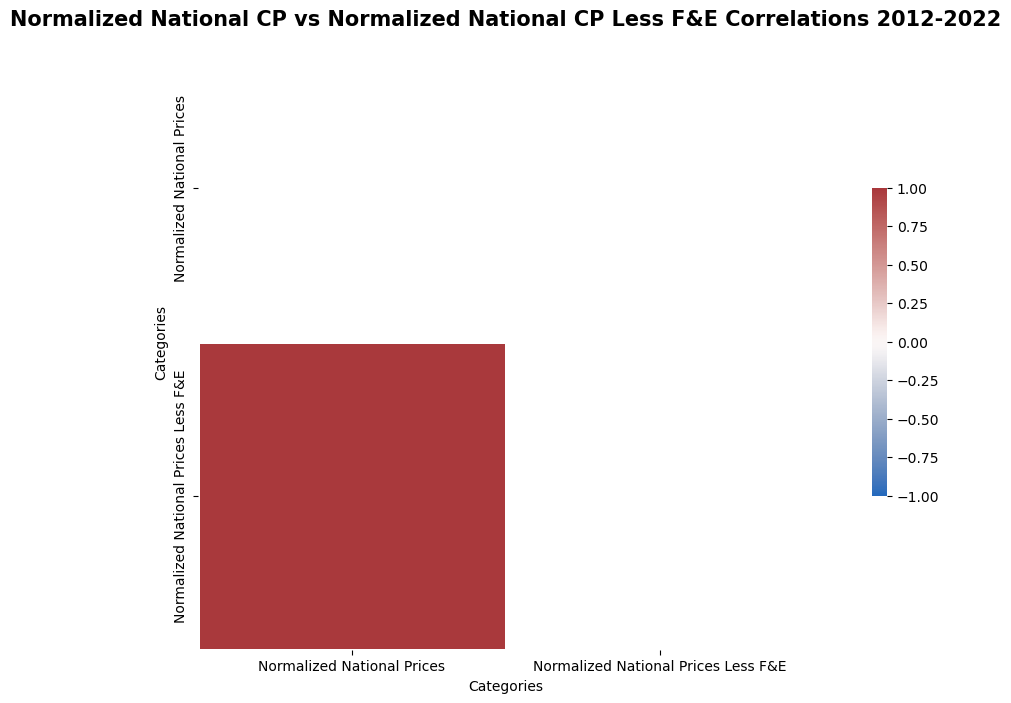

In [105]:
# Storing seaborn heatmap
seaborn_heatmap_1 = get_save_sns_fig(national_dfs, 'Normalized National CP vs Normalized National CP Less F&E Correlations 2012-2022')

In [106]:
# Lambda method to get percent change from DataFrame
get_percent_change = lambda df: df.pct_change().dropna()

In [107]:
# Storing national percent change DataFrame
national_pctchange_df = get_percent_change(national_dfs)
# Displaying national percent change DataFrame
national_pctchange_df

,Normalized National Prices,Normalized National Prices Less F&E
Date,,
2012-02-01,0.004403,0.002764
2012-03-01,0.007595,0.003818
2012-04-01,0.003021,0.002483
2012-05-01,-0.001173,0.001304
2012-06-01,-0.001466,0.001206
...,...,...
2022-05-01,0.011024,0.005707
2022-06-01,0.013736,0.007432
2022-07-01,-0.000118,0.003278


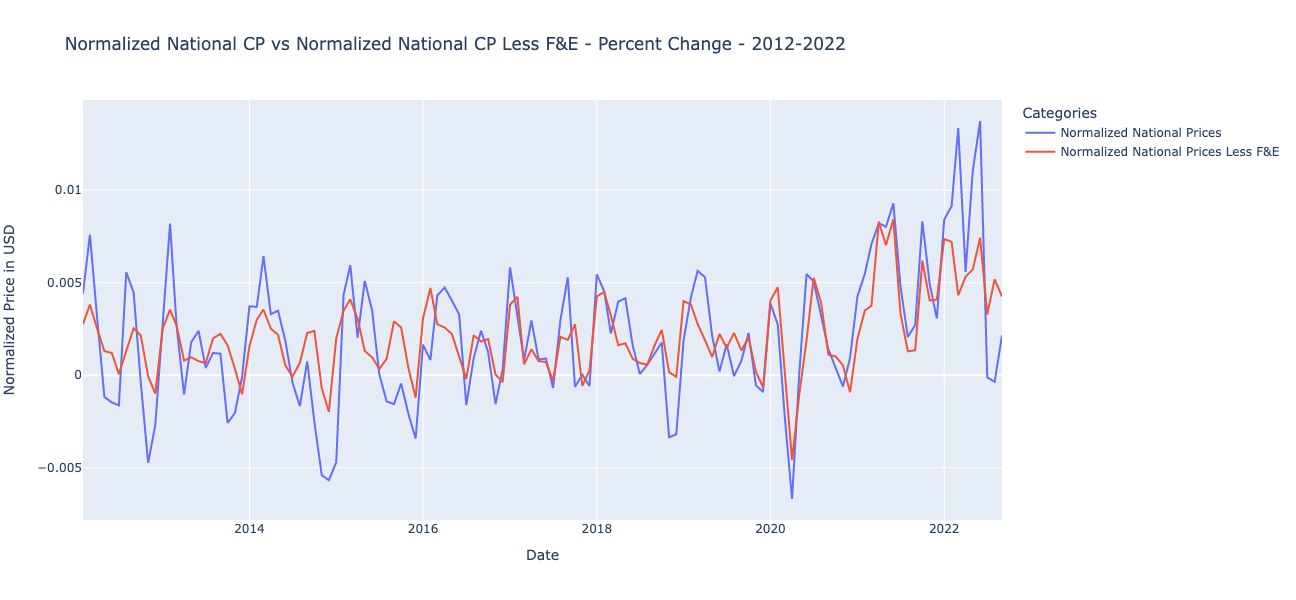

In [108]:
# Store plotly line plot
plotly_line_plot_4 = get_show_px_fig(national_pctchange_df, "Normalized National CP vs Normalized National CP Less F&E - Percent Change - 2012-2022")

In [109]:
# Storing 2010s national percent change DataFrame
national_2010s_pctchange_df = get_percent_change(national_2010s_df)
# Displaying 20120s national percent change DataFrame
national_2010s_pctchange_df

,Normalized National Prices,Normalized National Prices Less F&E
Date,,
2012-02-01,0.004403,0.002764
2012-03-01,0.007595,0.003818
2012-04-01,0.003021,0.002483
2012-05-01,-0.001173,0.001304
2012-06-01,-0.001466,0.001206
...,...,...
2019-08-01,-0.000051,0.002288
2019-09-01,0.000783,0.001336
2019-10-01,0.002286,0.002030


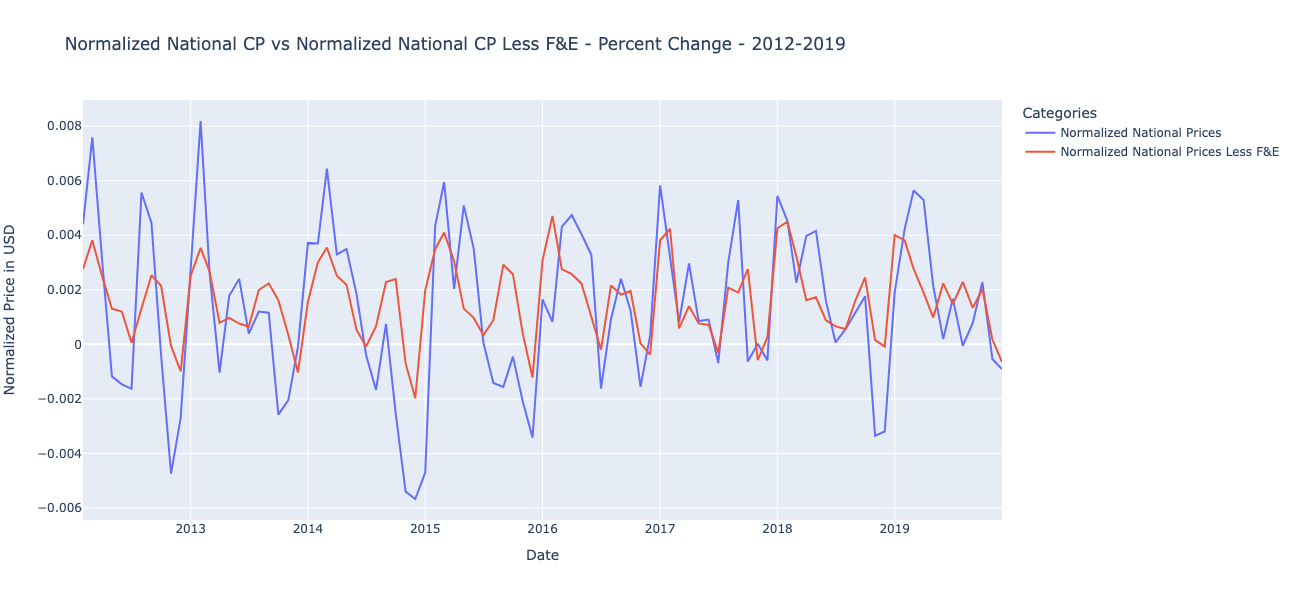

In [110]:
# Store plotly line plot
plotly_line_plot_5 = get_show_px_fig(national_2010s_pctchange_df, "Normalized National CP vs Normalized National CP Less F&E - Percent Change - 2012-2019")

In [111]:
# Storing 2020s national percent change DataFrame
national_2020s_pctchange_df = get_percent_change(national_2020s_df)
# Displaying 20120s national percent change DataFrame
national_2020s_pctchange_df.head()

,Normalized National Prices,Normalized National Prices Less F&E
Date,,
2020-02-01,0.002741,0.004752
2020-03-01,-0.002176,0.000165
2020-04-01,-0.006687,-0.004575
2020-05-01,0.000020,-0.001090
2020-06-01,0.005472,0.001892


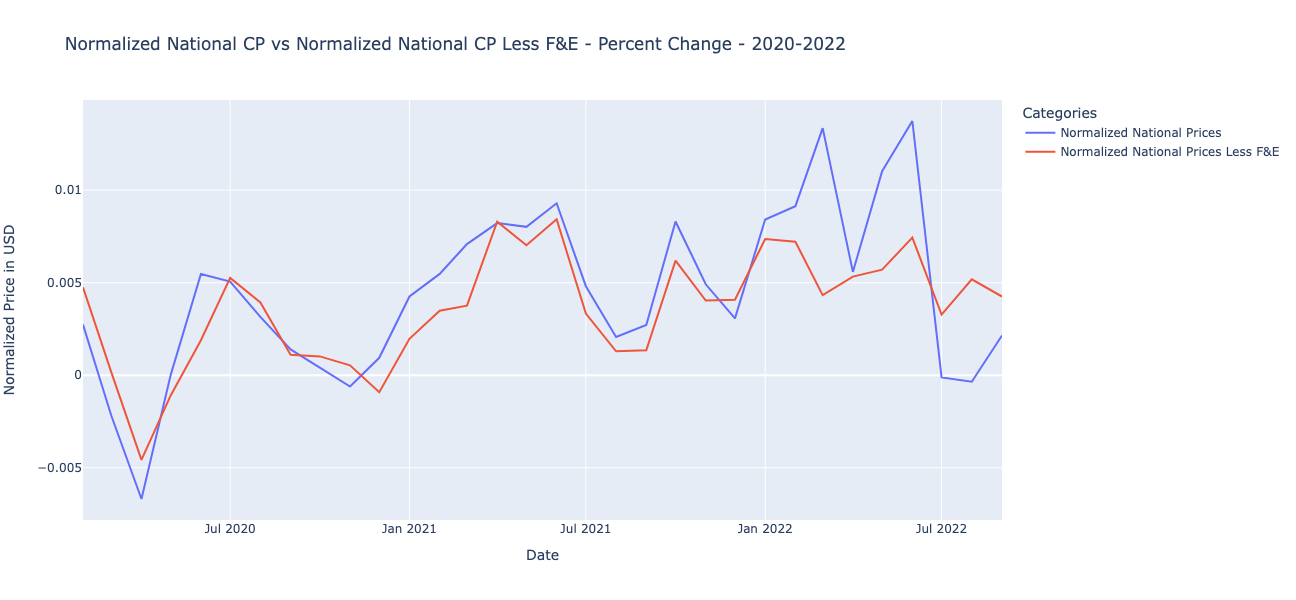

In [112]:
# Store plotly line plot
plotly_line_plot_6 = get_show_px_fig(national_2020s_pctchange_df, "Normalized National CP vs Normalized National CP Less F&E - Percent Change - 2020-2022")

## Explanation

The analysis shows that the actual and reported inflation have a strong correlation, and have exhibited a similar linear growth trend. 

From 2012 - 2014, the normalized prices of the reported and actual inflation were similar, but the actual inflation normalized price comparatively reduced from 2014 onwards. The decrease in price can be attributed to the food and energy normalized prices increasing at a comparatively lower rate. From 2020 onwards, both the reported and actual inflation experienced a sharp increase, and both measures of inflation reached a similar normalized price level. This indicates that the food and energy prices increased a significantly higher pace, compared to the other basket of goods, during the pandemic. 

The research also revealed that the actual inflation percentage change is notably more volatile compared to the reported inflation percentage change. The is caused by the food and energy normalized prices percentage change being significantly more volatile than the rest of the basket of goods. Our research reveals that the actual inflation, compared to the reported inflation, is far more volatile, and that unpredictable price movements have a far greater impact on the public.       

## Part 2: Food and Energy Inflation Analysis & Impact on Overall Inflation

The analysis below we will answer the following questions:
 - What is the price movement for Food and Energy? Do we see an inflationary spike above 2%?
 - What is the correlation in price movements of Food, Energy, and All Sectors (Including and Excluding Food and Energy)?
 - What we can conclude from the analysis?

### Analysis/Visualizations

In [113]:
# Data as dictionary
data_dictionary = {
    'Energy': energy_df,
    'Food': food_df,
    'National': national_df,
    'National Less F&E': national_less_food_energy_df
}

# Storing data
data_df = get_analysis_dataframe(data_dictionary)
# Displaying data
data_df

,Energy,Food,National,National Less F&E
Date,,,,
2012-01-01,236.942,232.666,226.665,227.237
2012-02-01,242.663,232.486,227.663,227.865
2012-03-01,253.599,232.792,229.392,228.735
2012-04-01,255.736,233.234,230.085,229.303
2012-05-01,250.306,233.339,229.815,229.602
...,...,...,...,...
2022-05-01,316.761,302.038,292.296,292.506
2022-06-01,340.917,305.041,296.311,294.680
2022-07-01,325.407,308.532,296.276,295.646


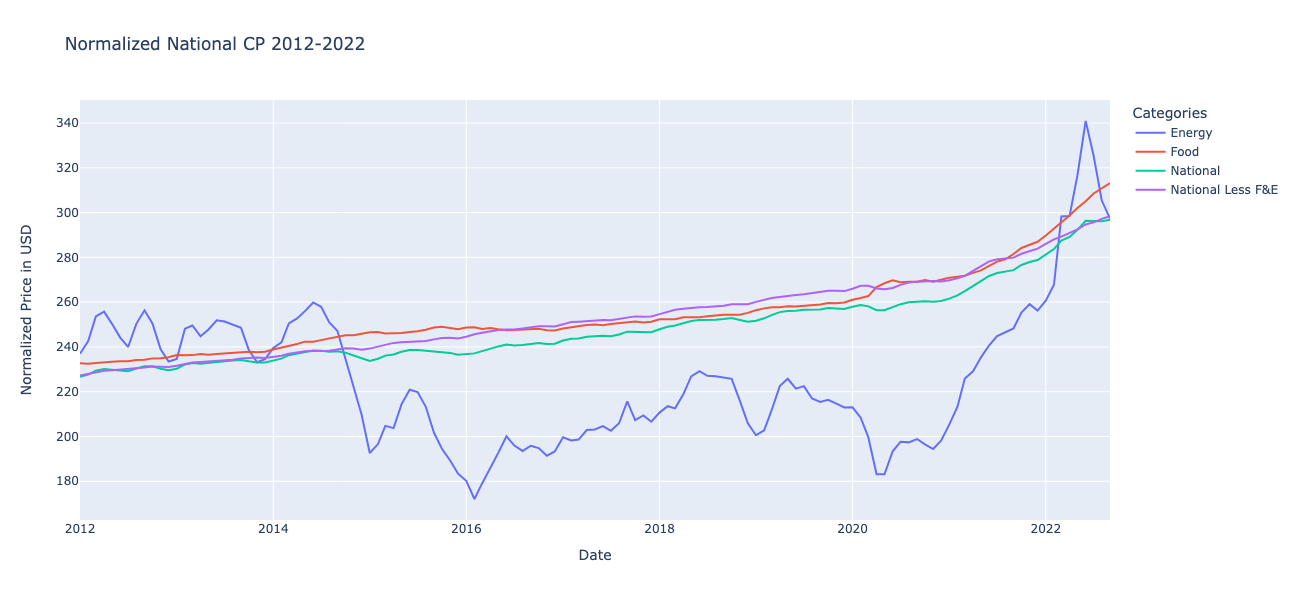

In [114]:
# Store plotly line plot
plotly_line_plot_7 = get_show_px_fig(data_df, "Normalized National CP 2012-2022")

In [115]:
data_2010s = data_df.loc[:'2019-12-01']
data_2020s = data_df.loc['2020-01-01':]

display(data_2010s.head(), data_2020s.head())

,Energy,Food,National,National Less F&E
Date,,,,
2012-01-01,236.942,232.666,226.665,227.237
2012-02-01,242.663,232.486,227.663,227.865
2012-03-01,253.599,232.792,229.392,228.735
2012-04-01,255.736,233.234,230.085,229.303
2012-05-01,250.306,233.339,229.815,229.602


,Energy,Food,National,National Less F&E
Date,,,,
2020-01-01,213.043,261.057,257.971,266.004
2020-02-01,208.354,261.876,258.678,267.268
2020-03-01,199.573,262.708,258.115,267.312
2020-04-01,183.081,266.757,256.389,266.089
2020-05-01,183.076,268.439,256.394,265.799


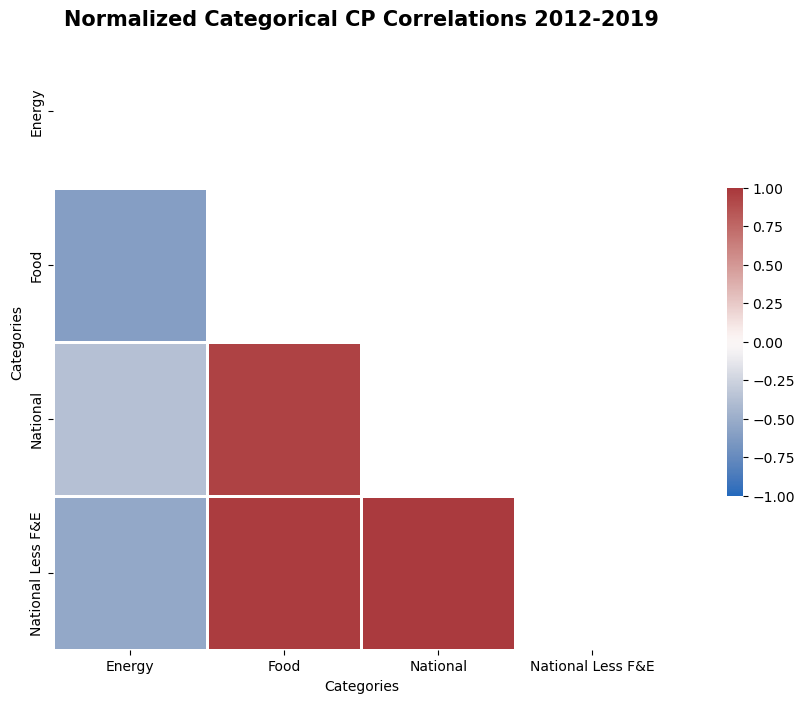

In [116]:
# Storing seaborn heatmap
seaborn_heatmap_2 = get_save_sns_fig(data_2010s, 'Normalized Categorical CP Correlations 2012-2019')

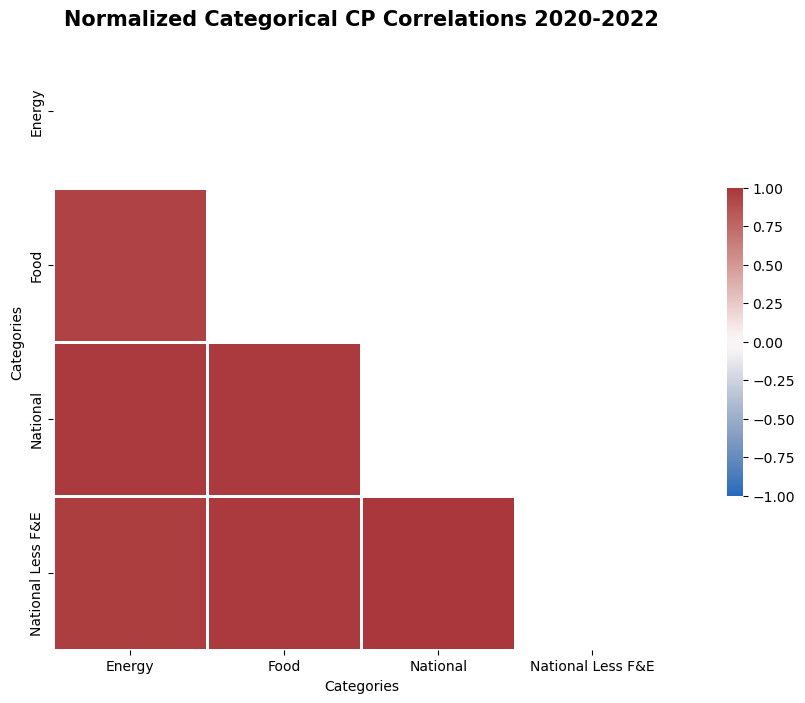

In [117]:
# Storing seaborn heatmap
seaborn_heatmap_3 = get_save_sns_fig(data_2020s, 'Normalized Categorical CP Correlations 2020-2022')

In [118]:
data_2010s_pctchange = data_2010s.pct_change().dropna()
data_2020s_pctchange = data_2020s.pct_change().dropna()

display(data_2010s_pctchange.head(), data_2020s_pctchange.head())

,Energy,Food,National,National Less F&E
Date,,,,
2012-02-01,0.024145,-0.000774,0.004403,0.002764
2012-03-01,0.045067,0.001316,0.007595,0.003818
2012-04-01,0.008427,0.001899,0.003021,0.002483
2012-05-01,-0.021233,0.000450,-0.001173,0.001304
2012-06-01,-0.024526,0.000960,-0.001466,0.001206


,Energy,Food,National,National Less F&E
Date,,,,
2020-02-01,-0.022010,0.003137,0.002741,0.004752
2020-03-01,-0.042145,0.003177,-0.002176,0.000165
2020-04-01,-0.082636,0.015413,-0.006687,-0.004575
2020-05-01,-0.000027,0.006305,0.000020,-0.001090
2020-06-01,0.056277,0.004958,0.005472,0.001892


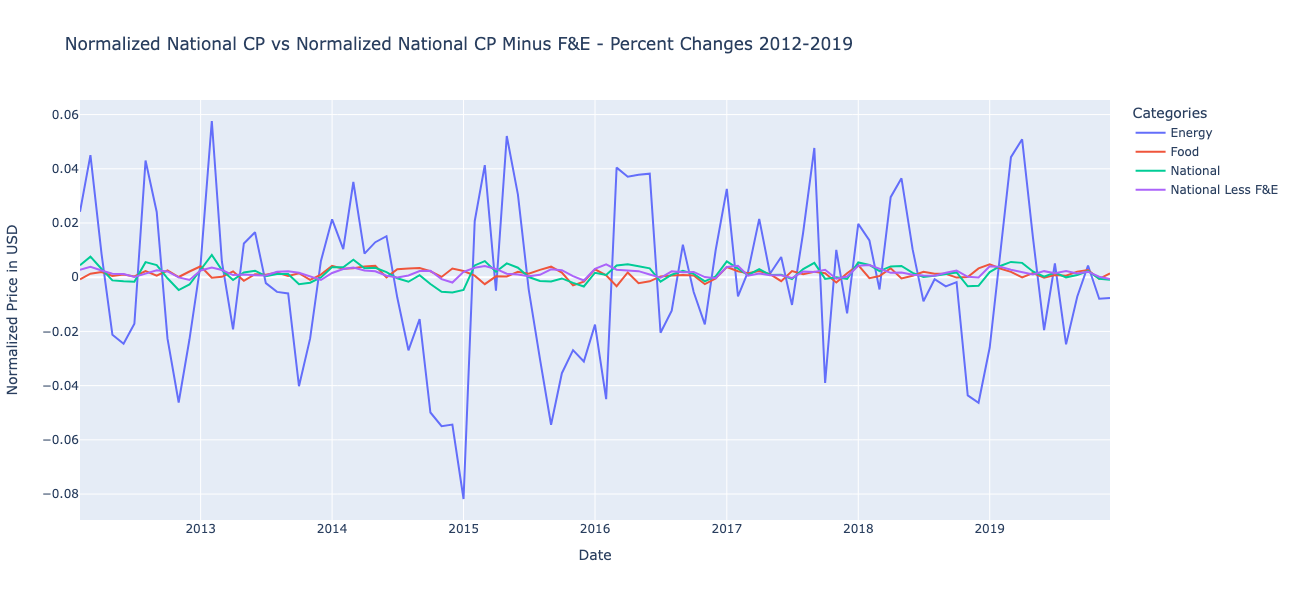

In [119]:
# Store plotly line plot
plotly_line_plot_8 = get_show_px_fig(data_2010s_pctchange, "Normalized National CP vs Normalized National CP Minus F&E - Percent Changes 2012-2019")

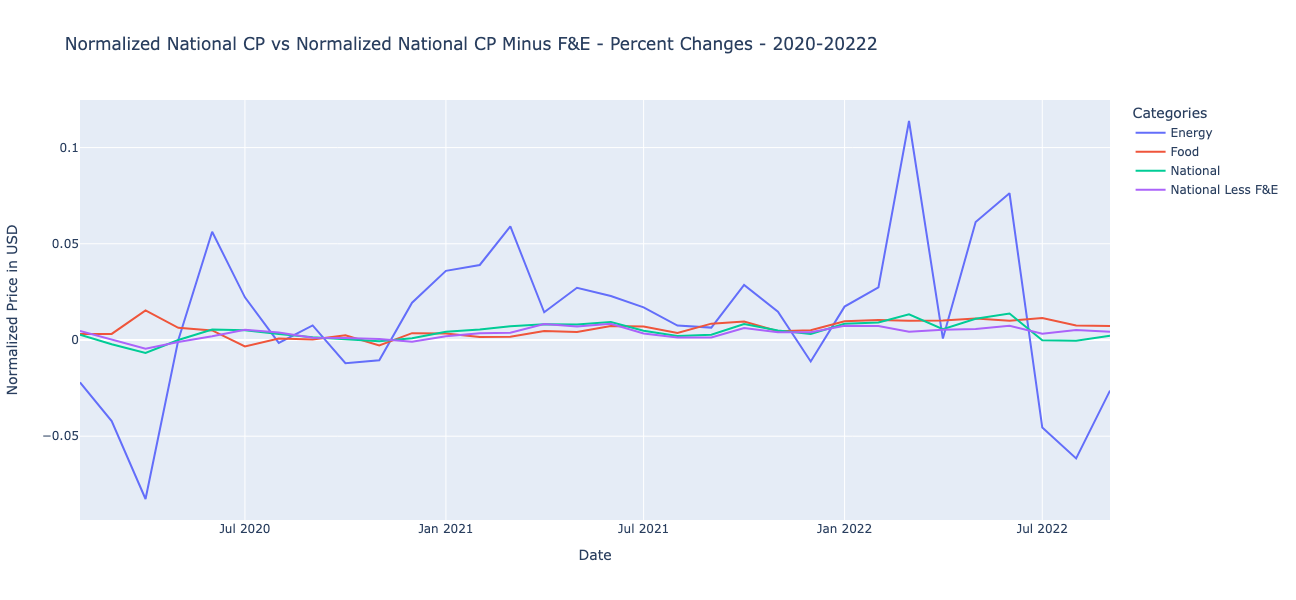

In [120]:
plotly_line_plot_9 = get_show_px_fig(data_2020s_pctchange, "Normalized National CP vs Normalized National CP Minus F&E - Percent Changes - 2020-20222")

### Analysis Conclusion & Meaning

- From 2012 to 2022, the price of food increased by approximately 80 USD, while energy increased by approximitely 60 USD.
    - The increase of prices in these two sectors over a decade is expected. What is important to note, is the rate of increase we start to see in 2020.
    - The average percent change, shortly after April of 2020 and the start of the pandemic, prices increased monthly at higher rates than previously seen.
    
    
- To analyze the correlation of price movements of Food, Energy, and National Pricing we broke them up into two timelines, prior to 2020 and after 2020.
    - Our analysis found that prior to 2020 energy prices moved completely different from food and national prices. The energy sector was the only sector with no correlation to all others.
    - After 2020, the story changes substantionally. The energy sector goes from no correlation to almost having a perfect correlation in pricing movements with food and all sectors.
    

- In conclusion, our analysis shows how high inflationary times bring high correlations across all sectors. Food and Energy make a substantial impact to overall pricing and therefore to inflation.
    - Inflation was impacted substantially more when you add food and energy.
    - Energy has a very volatile price movement and can therefore have a bigger influence on overall inflation if included as part of analysis.
    - We can conclude that after 2020, the pandemic, we saw a large increase in prices across all sectors, triggering an inflationary trajectory that the economy faces today.

## Part 3: Differences in inflation between the Midwest, Northeast, South and West region of the United States

The primary reason why food and energy prices are excluded from CPI calcualtions (and thus reported inflation metrics) is their wide variability across a country as large as the United States.
<br />
It therefore becomes necessary to analyze prices on a regional basis to better understand this difference and contextualize geographically-specific trends. 
<br /> <br />
Here we will answer the following: 
<br />
How much have prices increased on average in each region both before and after January 2020?

### Analysis/Visualizations

In [121]:
midwest_df = midwest_df.rename(columns = {'Price':'Midwest'})
northeast_df = northeast_df.rename(columns = {'Price':'Northeast'})
south_df = south_df.rename(columns = {'Price':'South'})
west_df = west_df.rename(columns = {'Price':'West'})

In [122]:
all_regions_df = pd.concat([midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')

all_regions_df.head()

,Midwest,Northeast,South,West
Date,,,,
2012-01-01,216.368,242.879,220.497,228.980
2012-02-01,216.855,243.850,221.802,229.995
2012-03-01,218.975,245.125,223.314,232.039
2012-04-01,219.405,245.850,224.275,232.561
2012-05-01,219.145,245.709,223.356,233.053


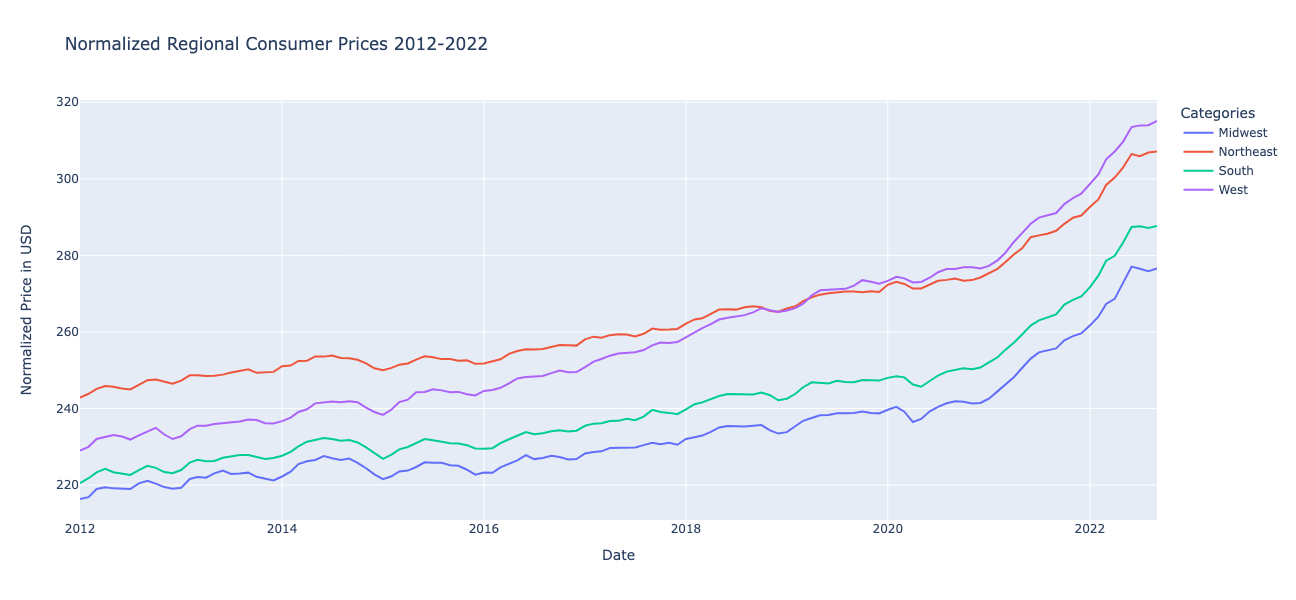

In [123]:
# Store plotly line plot
plotly_line_plot_10 = get_show_px_fig(all_regions_df, "Normalized Regional Consumer Prices 2012-2022")

In [124]:
regions_df = pd.DataFrame({
    'Region':['Midwest','Northeast','South','West'],
    'Latitude':[41.881832,40.730610,33.753746,40.759926],
    'Longitude':[-87.623177,-73.935242,-84.386330,-111.884888],
})

In [125]:
all_regions_mapped_df = pd.concat([regions_df[['Region','Latitude','Longitude']]]*129, ignore_index=True).sort_values('Region').reset_index().drop(columns='index')

dates = pd.DataFrame([int(date[:10].replace('-','')) for date in all_regions_df.index.values.astype(str)])

all_regions_mapped_df['Date'] = pd.concat([dates,dates,dates,dates]).reset_index().drop(columns='index')
all_regions_mapped_df['Price'] = pd.concat([all_regions_df[i] for i in all_regions_df.columns]).reset_index()[0]


all_regions_mapped_df = all_regions_mapped_df[['Date','Price', 'Region', 'Latitude', 'Longitude']]

all_regions_mapped_df

,Date,Price,Region,Latitude,Longitude
0,20120101,216.368,Midwest,41.881832,-87.623177
1,20120201,216.855,Midwest,41.881832,-87.623177
2,20120301,218.975,Midwest,41.881832,-87.623177
3,20120401,219.405,Midwest,41.881832,-87.623177
4,20120501,219.145,Midwest,41.881832,-87.623177
...,...,...,...,...,...
511,20220501,309.645,West,40.759926,-111.884888
512,20220601,313.496,West,40.759926,-111.884888
513,20220701,313.951,West,40.759926,-111.884888
514,20220801,314.013,West,40.759926,-111.884888


In [128]:
all_regions_mapped_df_plot = all_regions_mapped_df.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Price',
    color='Price',
    cmap='nipy_spectral',
    scale=4,
    groupby='Date',
    ylabel='Latitude',
    xlabel='Longitude',
    clabel='Price',
    clim=(220,315),
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Monthly Regional Consumer Prices January 2012 to September 2022'
).opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(all_regions_mapped_df_plot, './assets/html-plots/monthly_regional_consumer_prices_january_2012_to_September_2022.html')
all_regions_mapped_df_plot

:DynamicMap   [Date]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Price)

In [129]:
national_df = national_df.rename(columns = {'Price':'National'})

In [131]:
combined_df = pd.concat([national_df, midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')
combined_df.head()

,National,Midwest,Northeast,South,West
Date,,,,,
2012-01-01,226.665,216.368,242.879,220.497,228.980
2012-02-01,227.663,216.855,243.850,221.802,229.995
2012-03-01,229.392,218.975,245.125,223.314,232.039
2012-04-01,230.085,219.405,245.850,224.275,232.561
2012-05-01,229.815,219.145,245.709,223.356,233.053


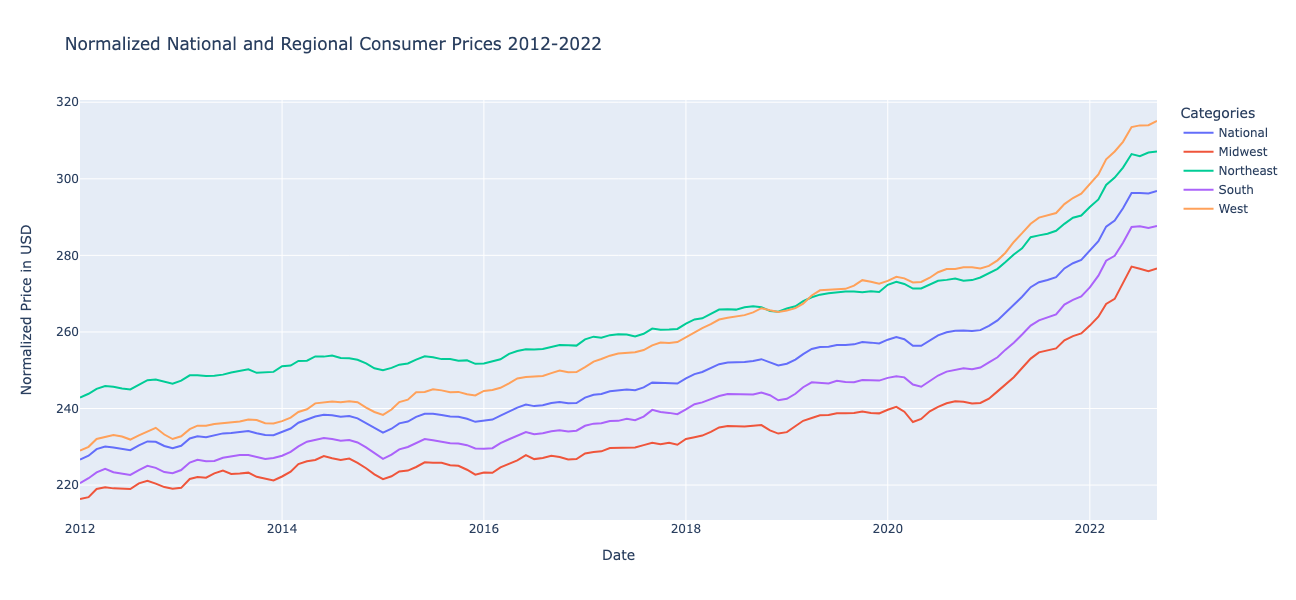

In [132]:
# Store plotly line plot
plotly_line_plot_11 = get_show_px_fig(combined_df, "Normalized National and Regional Consumer Prices 2012-2022")

In [133]:
combined_corr = combined_df.corr()
combined_corr

,National,Midwest,Northeast,South,West
National,1.000000,0.994282,0.999581,0.998443,0.994116
Midwest,0.994282,1.000000,0.993716,0.997840,0.977289
Northeast,0.999581,0.993716,1.000000,0.997695,0.993692
South,0.998443,0.997840,0.997695,1.000000,0.986850
West,0.994116,0.977289,0.993692,0.986850,1.000000


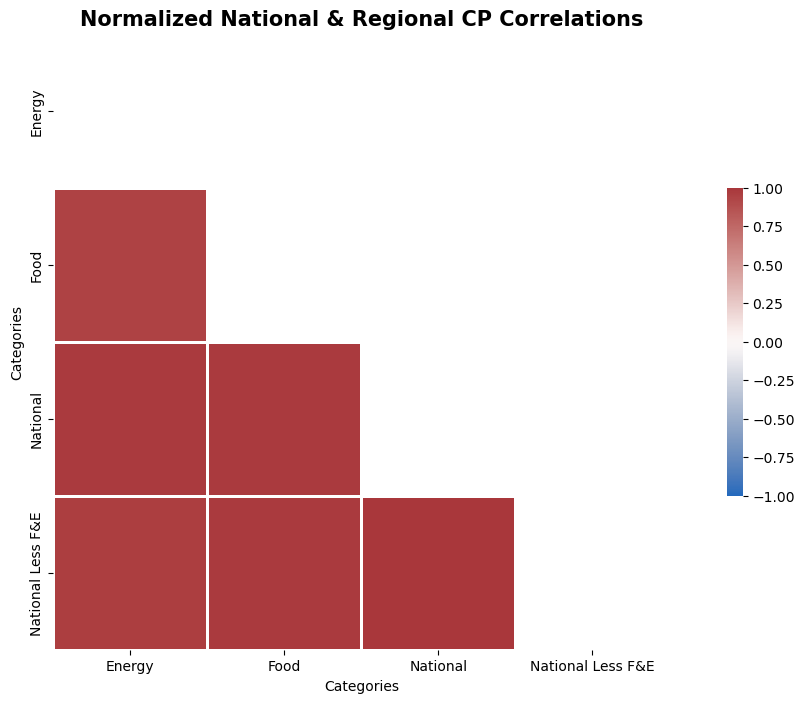

In [134]:
# Storing seaborn heatmap
seaborn_heatmap_4 = get_save_sns_fig(data_2020s, 'Normalized National & Regional CP Correlations')

In [135]:
#find percent change in each reagion per month
all_regions_pct = all_regions_df.pct_change().dropna()
all_regions_pct.tail()

,Midwest,Northeast,South,West
Date,,,,
2022-05-01,0.015016,0.008704,0.012248,0.008139
2022-06-01,0.016133,0.011600,0.014543,0.012437
2022-07-01,-0.001974,-0.001752,0.000630,0.001451
2022-08-01,-0.002351,0.003069,-0.001530,0.000197
2022-09-01,0.002443,0.000968,0.001699,0.003443


In [136]:
# crate seperate dataframes for dates before and after January 2020
all_regions_pct_b20 = all_regions_pct[:95]
all_regions_pct_a20 = all_regions_pct[95:]

display(all_regions_pct_b20.head())
display(all_regions_pct_a20.head())

,Midwest,Northeast,South,West
Date,,,,
2012-02-01,0.002251,0.003998,0.005918,0.004433
2012-03-01,0.009776,0.005229,0.006817,0.008887
2012-04-01,0.001964,0.002958,0.004303,0.002250
2012-05-01,-0.001185,-0.000574,-0.004098,0.002116
2012-06-01,-0.000584,-0.002067,-0.001576,-0.001510


,Midwest,Northeast,South,West
Date,,,,
2020-01-01,0.004004,0.006978,0.002895,0.002773
2020-02-01,0.003050,0.002806,0.001641,0.003922
2020-03-01,-0.005232,-0.002010,-0.001111,-0.001520
2020-04-01,-0.011243,-0.004425,-0.007585,-0.003949
2020-05-01,0.003455,0.000074,-0.002266,0.000546


In [137]:
all_regions_pct_b20_avg = all_regions_pct_b20.mean()
all_regions_pct_a20_avg = all_regions_pct_a20.mean()

display(all_regions_pct_b20_avg)
display(all_regions_pct_a20_avg)

Midwest      0.001043
Northeast    0.001135
South        0.001213
West         0.001842
dtype: float64

Midwest      0.004481
Northeast    0.003874
South        0.004604
West         0.004409
dtype: float64

In [138]:
all_regions_pct_before_2020 = regions_df.copy()
all_regions_pct_before_2020['Average Percentage Change'] = all_regions_pct_b20_avg.values
all_regions_pct_before_2020

,Region,Latitude,Longitude,Average Percentage Change
0,Midwest,41.881832,-87.623177,0.001043
1,Northeast,40.730610,-73.935242,0.001135
2,South,33.753746,-84.386330,0.001213
3,West,40.759926,-111.884888,0.001842


In [139]:
all_regions_pct_before_2020_plot = all_regions_pct_before_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Average Percentage Change',
    color='Average Percentage Change',
    scale=1300,
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Percent Change',
    frame_width=1200,
    frame_height=500,
    tiles='OSM',
    title='Average Regional Consumer Price Percentage Change 2012-2019').opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(all_regions_pct_before_2020_plot,'./assets/html-plots/average_regional_consumer_price_percentage_change_2012-2019_plot.html')
all_regions_pct_before_2020_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Percentage Change)

In [140]:
all_regions_pct_after_2020 = regions_df.copy()
all_regions_pct_after_2020['Average Percentage Change'] = all_regions_pct_a20_avg.values
all_regions_pct_after_2020

,Region,Latitude,Longitude,Average Percentage Change
0,Midwest,41.881832,-87.623177,0.004481
1,Northeast,40.730610,-73.935242,0.003874
2,South,33.753746,-84.386330,0.004604
3,West,40.759926,-111.884888,0.004409


In [141]:
all_regions_pct_after_2020_plot = all_regions_pct_after_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Average Percentage Change',
    color='Average Percentage Change',
    scale=1300,
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Percent Change',
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Average Regional Consumer Price Percentage Change 2020-2022').opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(all_regions_pct_after_2020_plot, './assets/html-plots/average_regional_consumer_price_percentage_change_2020-2022_plot.html')
all_regions_pct_after_2020_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Percentage Change)

## Explanation
From January 2012 to December of 2019 prices increased by between .1% and .18% on average per month.
<br />
During this period, the Midwest had the lowest average price increases.
<br />
And during this period the West had the highest average price increases.
<br /><br />
From January 2020 to September 2022 prices increased by between .38% and .46% on average per month. 
<br />
During this period, the Northeast had the lowest average price increases.
<br />
And during this period the South had the highest average price increases.

## Dashboard

In [ ]:
get_column = lambda fig: pn.Column(pn.Row(fig))

tabs = pn.Tabs(
                ('Plot1',all_regions_mapped_df_plot), 
                ('Plot2',all_regions_pct_before_2020_plot),
                ('Plot3',all_regions_pct_after_2020_plot),
                ('Plot4',get_column(fig5)),
                ('Plot5',get_column(fig6)),
                ('Plot6',get_column(fig7)),
                ('Plot7',get_column(fig10)),
                ('Plot8',get_column(fig11)),
                ('Plot9',get_column(fig12)),
                ('Plot10',get_column(fig13)),
                ('Plot11',get_column(fig15)),
                ('Plot12',get_column(fig3)),
                ('Plot13',get_column(fig1)),
                ('Plot14',get_column(fig2)),
                ('Plot15',pn.pane.Matplotlib(fig4)),
                ('Plot16',pn.pane.Matplotlib(fig8)),
                ('Plot17',pn.pane.Matplotlib(fig9)),
                ('Plot18',pn.pane.Matplotlib(fig14))
               
)
tabs

## Conclusion

### From our three part analysis we have concluded the following:
- Actual and reported inflation have a strong correlation.
- Actual and reported inflation have exhibited a similar linear growth trend. 
- From 2012 to 2022, the normalized price of food increased by approximately 80 normalized price units, while energy by approximitely 60 normalized price units.
- High inflationalry times brings high correlations across all sectors.
- Energy has a very volitine normalized price movement and can therefore have a bigger influence of overall inflation if included in as part of analysis.
- We can conclude that after 2020, the pandemic, we saw a large increase in prices across all sectors and triggering an inflationary trajectory that the economy faces today.
- Prior to January of 2020 normalized prices increaseed by  between .1% and .18% on average per month regionally.
- In the 2020s normalized prices have increased by between .38% and .46% on average per month.

## Additional Research Topics
- The impact of inflation can be further researched by investigating:
- The price changes of shelter over time
- The price changes of medical care over time
- The inflation trends, over time, during Democrat or Republican presidencies
- The impact of inflation on the financial security of the average person